# Sklearn Workshop

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ETL
- load the data

In [2]:
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## 2. EDA
- output : top three feature

In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4978.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.904632,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.044911,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.207500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.850000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df['work_type'].value_counts()

Private          2856
Self-employed     803
children          673
Govt_job          643
Name: work_type, dtype: int64

In [9]:
#feature engineering
df['Residence_type'].value_counts()
#it's quite simiar

Urban    2532
Rural    2445
Name: Residence_type, dtype: int64

In [10]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [11]:
df['ever_married'].value_counts()
#feature engineering
yes = df['ever_married'] == 'Yes'    
no = df['ever_married'] == 'No'    

In [12]:
df['marry_status'] = 1

In [13]:
df.loc[yes, 'marry_status'] = 1
df.loc[no, 'marry_status'] = 0

### 2.1 Univariate Analysis

<AxesSubplot:xlabel='marry_status', ylabel='count'>

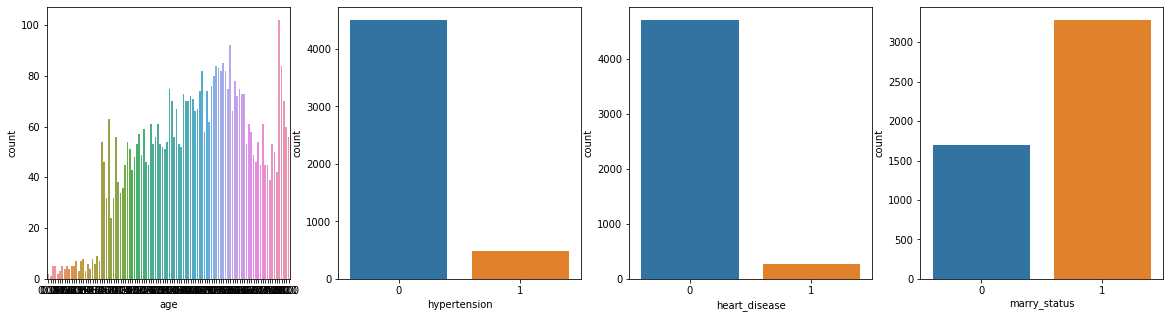

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(data=df,x='age')
plt.subplot(1,4,2)
sns.countplot(data=df,x='hypertension')
plt.subplot(1,4,3)
sns.countplot(data=df,x='heart_disease')
plt.subplot(1,4,4)
sns.countplot(data=df,x='marry_status')

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([228.69, 105.92, 171.23, ..., 191.15,  95.02,  83.94])

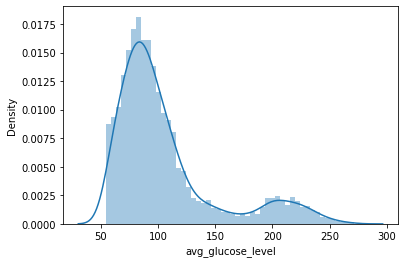

In [3]:
sns.distplot(df['avg_glucose_level'])
df['avg_glucose_level'].unique()
#median

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

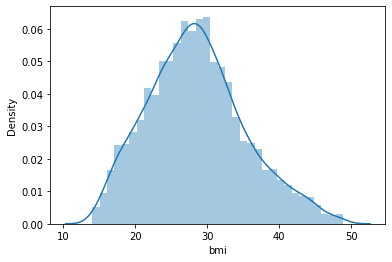

In [4]:
sns.distplot(df['bmi'])
# df['bmi'].unique()
#mean

In [6]:
# plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(), annot=True)

### A big problem: our data has imbalanced data!

In [9]:
#when i say, "imbalance". i mean imbalance in the "y" or the "label"
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [10]:
4733/ (4733+248)

0.950210801043967

In [11]:
#many ways to fix imbalances, but we gonna take only 248 for class 0

#1. create the df with class = 1
stroke_1 = df.loc[df['stroke'] == 1]
stroke_1.shape

(248, 11)

In [12]:
#2. create the df with class = 0
stroke_0 = df.loc[df['stroke'] == 0].sample(n=248, random_state=999)
stroke_0.shape

(248, 11)

In [13]:
new_df = pd.concat([stroke_1, stroke_0])
new_df['stroke'].value_counts()

1    248
0    248
Name: stroke, dtype: int64

In [14]:
new_df.shape

(496, 11)

## 3.Feature Extraction / Selection
- set X and y
- train test split

In [15]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
#before setting X and y
#i will transform data using label encoder and get_dummy first
#just for convenience, since it won't cause data leakage anyway

df.info()

#i need to consider age, hypertension, heart_disease, smoking status, avg_glucose_level
#ONLY smoking status is a problem

#format: pd.get_dummies(dataframe, columns, drop_first)
#drop_first means the advanced one-hot encoding i told you before

new_df = pd.get_dummies(new_df, columns=['smoking_status'], drop_first=True)

#please notice that one category of smoking status is gone
#because we use the advanced one-hot encoding by calling drop_first=True
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,1,1,0,0


In [17]:
new_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [26]:
#now set the X and y
X = new_df[  ['age', 
        'hypertension', 
        'heart_disease', 
        'avg_glucose_level', 
        'smoking_status_formerly smoked', 
        'smoking_status_never smoked',
        'smoking_status_smokes']   ]

y = new_df['stroke']

X.shape, y.shape

((496, 7), (496,))

In [28]:
#check imbalanced data
y.value_counts()

1    248
0    248
Name: stroke, dtype: int64

In [27]:
# feature = ['age','hypertension','heart_disease','avg_glucose_level']
# X = df[feature]
# y = df[['stroke']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=999)

In [29]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((347, 7), (149, 7), (347,), (149,))

In [30]:
X_train.info(), y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 341 to 3399
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             347 non-null    float64
 1   hypertension                    347 non-null    int64  
 2   heart_disease                   347 non-null    int64  
 3   avg_glucose_level               346 non-null    float64
 4   smoking_status_formerly smoked  347 non-null    uint8  
 5   smoking_status_never smoked     347 non-null    uint8  
 6   smoking_status_smokes           347 non-null    uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 14.6 KB
<class 'pandas.core.series.Series'>
Int64Index: 347 entries, 341 to 3399
Series name: stroke
Non-Null Count  Dtype
--------------  -----
347 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


(None, None)

## 4.Cleaning/Preprocessing
- clean missing values
- transfer categorical values to numbers
    - label encoder and one-hot encoder(get_dummy)

#### 4.1 Fill 

In [31]:
y_train.isna().sum(), y_test.isna().sum()
#avg_glucose_level is missing

(0, 0)

In [32]:
X_train.isna().sum(), X_test.isna().sum()
#avg_glucose_level is missing

(age                               0
 hypertension                      0
 heart_disease                     0
 avg_glucose_level                 1
 smoking_status_formerly smoked    0
 smoking_status_never smoked       0
 smoking_status_smokes             0
 dtype: int64,
 age                               0
 hypertension                      0
 heart_disease                     0
 avg_glucose_level                 2
 smoking_status_formerly smoked    0
 smoking_status_never smoked       0
 smoking_status_smokes             0
 dtype: int64)

In [33]:
median = X_train['avg_glucose_level'].median()

X_train['avg_glucose_level'].fillna(median, inplace=True)

X_test['avg_glucose_level'].fillna(median, inplace=True)


In [34]:
X_train.isna().sum(), X_test.isna().sum()
#No features is missing

(age                               0
 hypertension                      0
 heart_disease                     0
 avg_glucose_level                 0
 smoking_status_formerly smoked    0
 smoking_status_never smoked       0
 smoking_status_smokes             0
 dtype: int64,
 age                               0
 hypertension                      0
 heart_disease                     0
 avg_glucose_level                 0
 smoking_status_formerly smoked    0
 smoking_status_never smoked       0
 smoking_status_smokes             0
 dtype: int64)

#### 4.2 Standardized Data

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#DON'T Normalized y

In [36]:
X_train[:, 0].mean(), X_train[:, 1].mean(), X_train[:, 2].mean(), X_train[:, 3].mean()

(2.457208308104093e-16,
 -5.631102372738546e-17,
 -4.479285978314753e-17,
 2.3548246285997556e-16)

In [37]:
X_train[:, 0].std(), X_train[:, 1].std(), X_train[:, 2].std(), X_train[:, 3].std()

(1.0, 0.9999999999999998, 1.0, 0.9999999999999999)

## 5. Modeling
- cross validation --> grid search
- this problem is a classification problem
    - use RandomForestClassifier, SVC, LogisticRegression, GaussianNB

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

lor = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier(n_jobs=-1)  
sv = SVC()
gn = GaussianNB()

models = [rfc, sv, lor, gn]

from sklearn.model_selection import cross_val_score

scores = []

for model in models:
    scores.append(
        cross_val_score(model, X_train, np.array(y_train).reshape(-1), cv=10, 
                         scoring='accuracy')
                  )

print(scores)

[array([0.8       , 0.71428571, 0.74285714, 0.62857143, 0.82857143,
       0.71428571, 0.74285714, 0.70588235, 0.79411765, 0.79411765]), array([0.68571429, 0.82857143, 0.71428571, 0.6       , 0.74285714,
       0.71428571, 0.77142857, 0.82352941, 0.79411765, 0.76470588]), array([0.74285714, 0.85714286, 0.74285714, 0.62857143, 0.82857143,
       0.71428571, 0.71428571, 0.76470588, 0.73529412, 0.82352941]), array([0.68571429, 0.77142857, 0.77142857, 0.65714286, 0.8       ,
       0.62857143, 0.68571429, 0.79411765, 0.70588235, 0.67647059])]


In [39]:
print(np.mean(scores, axis=1))

#rf, sv, lr, gn
#hmm....lr seems the best! 

[0.74655462 0.74394958 0.75521008 0.71764706]


In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}
estimator = LogisticRegression(max_iter=1000)
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid,
                    cv = 5,  
                    n_jobs  = -1,
                    refit   = True, 
                    scoring = 'accuracy',
                    return_train_score=True)
                    
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [42]:
grid.best_params_

{'solver': 'newton-cg'}

## 6. Testing
- predict
- use from sklearn.metrics import accuracy
- use from sklearn.metrics import classification_report
    - don't worry about what is recall, precision, f1
        - i will explain later

### Grid Search

In [43]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report

yhat = grid.predict(X_test)

acc = accuracy_score(y_test,yhat)
crp = classification_report(y_test,yhat)

print("Accuracy :",acc)
print("classification_report : \n",crp)

Accuracy : 0.7919463087248322
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        78
           1       0.76      0.82      0.79        71

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.79      0.79      0.79       149



In [347]:
#It's too high Accuracy due to unbalancing data

## 7. Feature importance 
- can you try

In [348]:
#best parameters
print(f"Best params: {grid.best_params_}")

#best mse (score)
print(f"Best mse: {grid.best_score_}")

#you can retrieve the best model (basically the model trained the best_params_)
print(f"Best estimator: {grid.best_estimator_}")  #but you DON'T NEED THIS, because the `grid` itself is already 
#the best model, because of refit=True

Best params: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}
Best mse: -0.05134777371707646
Best estimator: RandomForestClassifier(max_depth=5, n_estimators=10)


In [44]:
grid.best_estimator_.coef_[0]

array([ 1.51894353,  0.21491552,  0.18181888,  0.2256257 ,  0.06897961,
       -0.16214134,  0.11743319])

<BarContainer object of 7 artists>

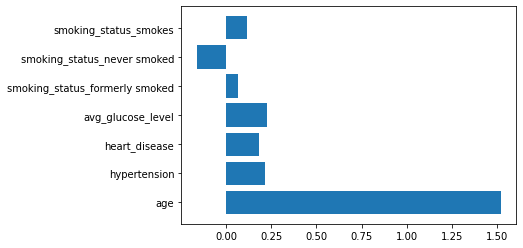

In [45]:
feature_names = ['age', 
                'hypertension', 
                'heart_disease', 
                'avg_glucose_level', 
                'smoking_status_formerly smoked', 
                'smoking_status_never smoked',
                'smoking_status_smokes']

plt.barh(feature_names, grid.best_estimator_.coef_[0])

In [46]:
#you can also try permutation and shap way here.
#i am not gonna do it....

## 8. Save Model

In [47]:
#import pickle
import pickle

#set the filename
filename = 'brain_stroke.pkl' #.pkl is optional but useful for reminder

#dump the file 
#format: pickle.dump(model, open(filename, 'wb')) #wb stands writing
pickle.dump(grid, open(filename, 'wb'))

#i can show you how to load the model
loaded_model = pickle.load(open(filename, 'rb'))